In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import boxcox
import seaborn as sns
from IPython.display import display

__Exploring & cleaning the world Dataset__

In [2]:
df_world = pd.read_csv('world-data-2023.csv')
df_world.head(10)

,Country,Density\n(P/Km2),Abbreviation,Agricultural Land( %),Land Area(Km2),Armed Forces size,Birth Rate,Calling Code,Capital/Major City,Co2-Emissions,...,Out of pocket health expenditure,Physicians per thousand,Population,Population: Labor force participation (%),Tax revenue (%),Total tax rate,Unemployment rate,Urban_population,Latitude,Longitude
0,Afghanistan,60,AF,58.10%,"652,230","323,000",32.49,93.0,Kabul,"8,672",...,78.40%,0.28,"38,041,754",48.90%,9.30%,71.40%,11.12%,"9,797,273",33.939110,67.709953
1,Albania,105,AL,43.10%,"28,748","9,000",11.78,355.0,Tirana,"4,536",...,56.90%,1.20,"2,854,191",55.70%,18.60%,36.60%,12.33%,"1,747,593",41.153332,20.168331
2,Algeria,18,DZ,17.40%,"2,381,741","317,000",24.28,213.0,Algiers,"150,006",...,28.10%,1.72,"43,053,054",41.20%,37.20%,66.10%,11.70%,"31,510,100",28.033886,1.659626
3,Andorra,164,AD,40.00%,468,NaN,7.20,376.0,Andorra la Vella,469,...,36.40%,3.33,"77,142",NaN,NaN,NaN,NaN,"67,873",42.506285,1.521801
4,Angola,26,AO,47.50%,"1,246,700","117,000",40.73,244.0,Luanda,"34,693",...,33.40%,0.21,"31,825,295",77.50%,9.20%,49.10%,6.89%,"21,061,025",-11.202692,17.873887
5,Antigua and Barbuda,223,AG,20.50%,443,0,15.33,1.0,"St. John's, Saint John",557,...,24.30%,2.76,"97,118",NaN,16.50%,43.00%,NaN,"23,800",17.060816,-61.796428
6,Argentina,17,AR,54.30%,"2,780,400","105,000",17.02,54.0,Buenos Aires,"201,348",...,17.60%,3.96,"44,938,712",61.30%,10.10%,106.30%,9.79%,"41,339,571",-38.416097,-63.616672
7,Armenia,104,AM,58.90%,"29,743","49,000",13.99,374.0,Yerevan,"5,156",...,81.60%,4.40,"2,957,731",55.60%,20.90%,22.60%,16.99%,"1,869,848",40.069099,45.038189
8,Australia,3,AU,48.20%,"7,741,220","58,000",12.60,61.0,Canberra,"375,908",...,19.60%,3.68,"25,766,605",65.50%,23.00%,47.40%,5.27%,"21,844,756",-25.274398,133.775136
9,Austria,109,AT,32.40%,"83,871","21,000",9.70,43.0,Vienna,"61,448",...,17.90%,5.17,"8,877,067",60.70%,25.40%,51.40%,4.67%,"5,194,416",47.516231,14.550072


In [3]:
print("Columns in df_world:")
print(df_world.columns)

# Specify the columns you want to select
selected_columns = ['Country', 'Density\n(P/Km2)', 'Agricultural Land( %)',
                     'Land Area(Km2)', 'Capital/Major City', 'Forested Area (%)',
                     'Gasoline Price', 'GDP', 'Largest city', 'Physicians per thousand', 
                     'Population', 'Population: Labor force participation (%)',
                     'Urban_population', 'Latitude', 'Longitude']

# Try to select the columns
try:
    df_world_selected = df_world[selected_columns]
    print("Selected columns successfully.")
except KeyError as e:
    print(f"KeyError: {e}")

Columns in df_world:
Index(['Country', 'Density\n(P/Km2)', 'Abbreviation', 'Agricultural Land( %)',
       'Land Area(Km2)', 'Armed Forces size', 'Birth Rate', 'Calling Code',
       'Capital/Major City', 'Co2-Emissions', 'CPI', 'CPI Change (%)',
       'Currency-Code', 'Fertility Rate', 'Forested Area (%)',
       'Gasoline Price', 'GDP', 'Gross primary education enrollment (%)',
       'Gross tertiary education enrollment (%)', 'Infant mortality',
       'Largest city', 'Life expectancy', 'Maternal mortality ratio',
       'Minimum wage', 'Official language', 'Out of pocket health expenditure',
       'Physicians per thousand', 'Population',
       'Population: Labor force participation (%)', 'Tax revenue (%)',
       'Total tax rate', 'Unemployment rate', 'Urban_population', 'Latitude',
       'Longitude'],
      dtype='object')
Selected columns successfully.


In [4]:
df_tourism=pd.read_csv('tourism-recipts.csv')
df_tourism.rename(columns={'name':'Country','year':'Year','value_$':'Revenue'}, inplace=True)
df_tourism.head(10)

,Country,code,Year,Revenue
0,Afghanistan,AFG,2008,57000000.0
1,Afghanistan,AFG,2009,89000000.0
2,Afghanistan,AFG,2010,147000000.0
3,Afghanistan,AFG,2011,165000000.0
4,Afghanistan,AFG,2012,167000000.0
5,Afghanistan,AFG,2013,179000000.0
6,Afghanistan,AFG,2014,121000000.0
7,Afghanistan,AFG,2015,86000000.0
8,Afghanistan,AFG,2016,62000000.0
9,Afghanistan,AFG,2017,16000000.0


In [5]:
df_tourism_arv=pd.read_csv('second_data/API_ST.INT.ARVL_DS2_en_csv_v2_1927083.csv')
df_tourism_arv.rename(columns={'Indicator Code':'IndicatorCode'},inplace=True)
#df_tourism_arv.rename(columns={'Country Name':'Country'}, inplace=True)
columns_kept=['Country Name','IndicatorCode','2011', '2012', '2013', '2014','2015','2016','2017','2018']
df_tourism_arv=df_tourism_arv[columns_kept]
df_tourism_arv.rename(columns={'Country Name':'Country'}, inplace=True)
df_tourism_arv.head()

,Country,IndicatorCode,2011,2012,2013,2014,2015,2016,2017,2018
0,Aruba,ST.INT.ARVL,869000.0,904000.0,979000.0,1072000.0,1225000.0,1102000.0,1070500.0,1082000.0
1,Afghanistan,ST.INT.ARVL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Angola,ST.INT.ARVL,481000.0,528000.0,650000.0,595000.0,592000.0,397000.0,261000.0,218000.0
3,Albania,ST.INT.ARVL,2469000.0,3156000.0,2857000.0,3341000.0,3784000.0,4070000.0,4643000.0,5340000.0
4,Andorra,ST.INT.ARVL,2242000.0,2238000.0,2328000.0,2363000.0,2663000.0,2819000.0,3003000.0,3042000.0


In [6]:
df_pivoted = df_tourism_arv.pivot(index='Country', columns='IndicatorCode', values=['2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018'])

# Flatten the MultiIndex columns
df_pivoted.columns = ['_'.join(map(str, col)) for col in df_pivoted.columns]

# Reset the index
df_pivoted.reset_index(inplace=True)

# Melt the DataFrame to have 'Year' as a column
df_tourism_arv = pd.melt(df_pivoted, id_vars=['Country'], var_name='Year_Indicator', value_name='ST.INT.ARVL')

# Extract 'Year' and 'Indicator' from 'Year_Indicator'
df_tourism_arv[['Year', 'Indicator']] = df_tourism_arv['Year_Indicator'].str.split('_', expand=True)

# Drop unnecessary columns
df_tourism_arv = df_tourism_arv[['Country', 'Year', 'ST.INT.ARVL']]
df_tourism_arv=df_tourism_arv.sort_values(by=['Country','Year'],ascending=True)
df_tourism_arv

,Country,Year,ST.INT.ARVL
0,Afghanistan,2011,NaN
264,Afghanistan,2012,NaN
528,Afghanistan,2013,NaN
792,Afghanistan,2014,NaN
1056,Afghanistan,2015,NaN
...,...,...,...
1055,Zimbabwe,2014,1880000.0
1319,Zimbabwe,2015,2057000.0
1583,Zimbabwe,2016,2168000.0
1847,Zimbabwe,2017,2423000.0


In [7]:
df_tourism_ex=pd.read_csv('second_data/API_ST.INT.XPND.CD_DS2_en_csv_v2_1929314.csv')
columns_kept2=['Country Name','Indicator Code','2011', '2012', '2013', '2014','2015','2016','2017','2018'] 

df_tourism_arv.rename(columns={'Indicator Code':'IndicatorCode'},inplace=True)
df_tourism_ex=df_tourism_ex[columns_kept2]
df_tourism_ex.head()

,Country Name,Indicator Code,2011,2012,2013,2014,2015,2016,2017,2018
0,Aruba,ST.INT.XPND.CD,2.870000e+08,2.940000e+08,3.420000e+08,3.510000e+08,3.590000e+08,3.320000e+08,3.620000e+08,3.580000e+08
1,Afghanistan,ST.INT.XPND.CD,2.550000e+08,1.100000e+08,1.380000e+08,1.400000e+08,1.510000e+08,8.900000e+07,1.300000e+08,2.260000e+08
2,Angola,ST.INT.XPND.CD,3.230000e+08,2.880000e+08,3.160000e+08,5.050000e+08,3.890000e+08,8.230000e+08,1.216000e+09,7.620000e+08
3,Albania,ST.INT.XPND.CD,1.677000e+09,1.374000e+09,1.567000e+09,1.689000e+09,1.311000e+09,1.338000e+09,1.473000e+09,1.750000e+09
4,Andorra,ST.INT.XPND.CD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
df_tourism_ex.rename(columns={'Country Name':'Country'}, inplace = True)
df_ex_pv=df_tourism_ex.pivot(index='Country' ,columns='Indicator Code', values=['2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018'])
df_ex_pv.columns =['_'.join(map(str,col))for col in df_ex_pv.columns]
df_ex_pv.reset_index(inplace=True)
df_melted= pd.melt(df_ex_pv,id_vars=['Country'], var_name='Year_Indicator', value_name='ST.INT.XPND.CD')
df_melted[['Year', 'Indicator']] = df_melted['Year_Indicator'].str.split('_', expand=True)
df_ex_pv=df_melted[['Country','Year','ST.INT.XPND.CD']]
df_ex_pv=df_ex_pv.sort_values(by=['Country','Year'])
df_ex_pv

,Country,Year,ST.INT.XPND.CD
0,Afghanistan,2011,255000000.0
264,Afghanistan,2012,110000000.0
528,Afghanistan,2013,138000000.0
792,Afghanistan,2014,140000000.0
1056,Afghanistan,2015,151000000.0
...,...,...,...
1055,Zimbabwe,2014,451000000.0
1319,Zimbabwe,2015,557000000.0
1583,Zimbabwe,2016,406000000.0
1847,Zimbabwe,2017,338000000.0


In [9]:
df_world_tourism=pd.merge(df_world,df_tourism, on='Country',how='right')
df_ex_arv= pd.merge(df_ex_pv,df_tourism_arv, on=['Country','Year'])
print(df_ex_arv[['Country', 'Year']].dtypes)
print(df_world_tourism[['Country', 'Year']].dtypes)


Country    object
Year       object
dtype: object
Country    object
Year        int64
dtype: object


In [10]:
df_ex_arv['Year'] = df_ex_arv['Year'].astype('int64')

In [11]:
print(df_ex_arv[['Country', 'Year']].dtypes)

Country    object
Year        int64
dtype: object


In [12]:
df= pd.merge(df_ex_arv,df_world_tourism, on=['Country','Year'], how='right')
df.columns


Index(['Country', 'Year', 'ST.INT.XPND.CD', 'ST.INT.ARVL', 'Density\n(P/Km2)',
       'Abbreviation', 'Agricultural Land( %)', 'Land Area(Km2)',
       'Armed Forces size', 'Birth Rate', 'Calling Code', 'Capital/Major City',
       'Co2-Emissions', 'CPI', 'CPI Change (%)', 'Currency-Code',
       'Fertility Rate', 'Forested Area (%)', 'Gasoline Price', 'GDP',
       'Gross primary education enrollment (%)',
       'Gross tertiary education enrollment (%)', 'Infant mortality',
       'Largest city', 'Life expectancy', 'Maternal mortality ratio',
       'Minimum wage', 'Official language', 'Out of pocket health expenditure',
       'Physicians per thousand', 'Population',
       'Population: Labor force participation (%)', 'Tax revenue (%)',
       'Total tax rate', 'Unemployment rate', 'Urban_population', 'Latitude',
       'Longitude', 'code', 'Revenue'],
      dtype='object')

In [13]:
selected_columns = ['Country','Year','ST.INT.XPND.CD', 'ST.INT.ARVL', 'Density\n(P/Km2)', 'Capital/Major City', 'Gasoline Price',
       'GDP', 'Largest city', 'Physicians per thousand', 'Population',
        'Urban_population', 'Revenue']
df=df[selected_columns]
df.head()

,Country,Year,ST.INT.XPND.CD,ST.INT.ARVL,Density\n(P/Km2),Capital/Major City,Gasoline Price,GDP,Largest city,Physicians per thousand,Population,Urban_population,Revenue
0,Afghanistan,2008,NaN,NaN,60,Kabul,$0.70,"$19,101,353,833",Kabul,0.28,"38,041,754","9,797,273",57000000.0
1,Afghanistan,2009,NaN,NaN,60,Kabul,$0.70,"$19,101,353,833",Kabul,0.28,"38,041,754","9,797,273",89000000.0
2,Afghanistan,2010,NaN,NaN,60,Kabul,$0.70,"$19,101,353,833",Kabul,0.28,"38,041,754","9,797,273",147000000.0
3,Afghanistan,2011,255000000.0,NaN,60,Kabul,$0.70,"$19,101,353,833",Kabul,0.28,"38,041,754","9,797,273",165000000.0
4,Afghanistan,2012,110000000.0,NaN,60,Kabul,$0.70,"$19,101,353,833",Kabul,0.28,"38,041,754","9,797,273",167000000.0


In [14]:
df.dtypes

Country                     object
Year                         int64
ST.INT.XPND.CD             float64
ST.INT.ARVL                float64
Density\n(P/Km2)            object
Capital/Major City          object
Gasoline Price              object
GDP                         object
Largest city                object
Physicians per thousand    float64
Population                  object
Urban_population            object
Revenue                    float64
dtype: object

In [16]:
columns_to_convert=['Density\n(P/Km2)','Gasoline Price','GDP','Population','Urban_population']
df[columns_to_convert] = df[columns_to_convert].apply(pd.to_numeric, errors='coerce')

In [17]:
df.dtypes


Country                     object
Year                         int64
ST.INT.XPND.CD             float64
ST.INT.ARVL                float64
Density\n(P/Km2)           float64
Capital/Major City          object
Gasoline Price             float64
GDP                        float64
Largest city                object
Physicians per thousand    float64
Population                 float64
Urban_population           float64
Revenue                    float64
dtype: object

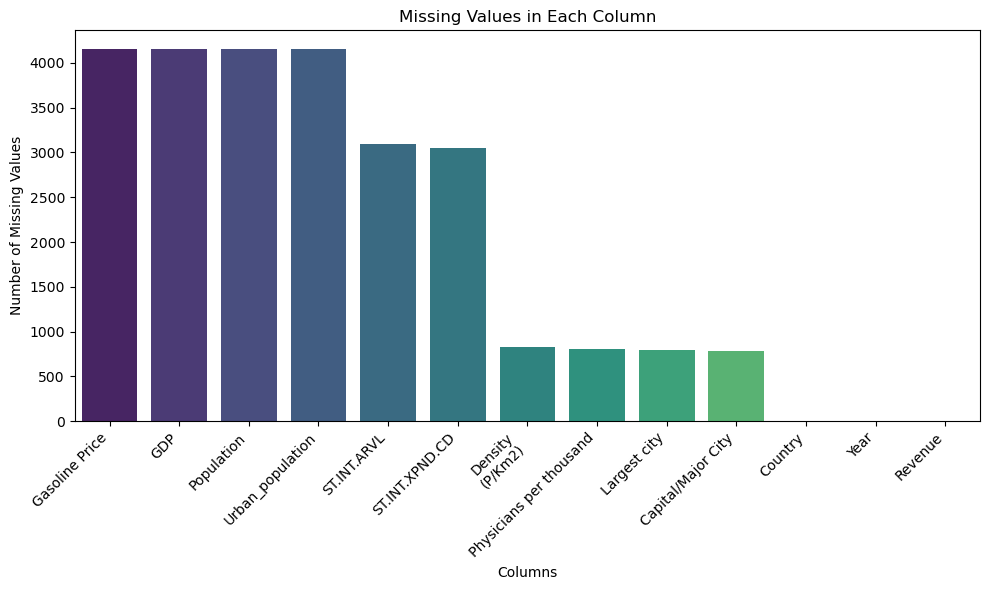

In [19]:
#df.isna().sum()
missing_values = df.isna().sum().sort_values(ascending=False)

# Create a bar plot using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=missing_values.index, y=missing_values, palette='viridis')
plt.title('Missing Values in Each Column')
plt.xlabel('Columns')
plt.ylabel('Number of Missing Values')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

In [21]:
df.count()

Country                    4156
Year                       4156
ST.INT.XPND.CD             1109
ST.INT.ARVL                1064
Density\n(P/Km2)           3328
Capital/Major City         3377
Gasoline Price                0
GDP                           0
Largest city               3366
Physicians per thousand    3351
Population                    0
Urban_population              0
Revenue                    4156
dtype: int64